In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("student_habits_performance.csv")

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

encoding_mappings = {
    col: dict(zip(le.classes_, le.transform(le.classes_)))
    for col, le in label_encoders.items()
}

In [2]:
df.describe()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000.000000,1000.0000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,20.4980,0.561000,3.55010,2.505500,1.819700,0.215000,84.131700,6.470100,0.7480,3.042000,0.999000,0.771000,5.438000,0.318000,69.601500
std,288.819436,2.3081,0.574987,1.46889,1.172422,1.075118,0.411028,9.399246,1.226377,0.7477,2.025423,0.939085,0.707856,2.847501,0.465932,16.888564
min,0.000000,17.0000,0.000000,0.00000,0.000000,0.000000,0.000000,56.000000,3.200000,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,18.400000
25%,249.750000,18.7500,0.000000,2.60000,1.700000,1.000000,0.000000,78.000000,5.600000,0.0000,1.000000,0.000000,0.000000,3.000000,0.000000,58.475000
50%,499.500000,20.0000,1.000000,3.50000,2.500000,1.800000,0.000000,84.400000,6.500000,1.0000,3.000000,1.000000,1.000000,5.000000,0.000000,70.500000
75%,749.250000,23.0000,1.000000,4.50000,3.300000,2.525000,0.000000,91.025000,7.300000,1.0000,5.000000,2.000000,1.000000,8.000000,1.000000,81.325000
max,999.000000,24.0000,2.000000,8.30000,7.200000,5.400000,1.000000,100.000000,10.000000,2.0000,6.000000,3.000000,2.000000,10.000000,1.000000,100.000000


In [3]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

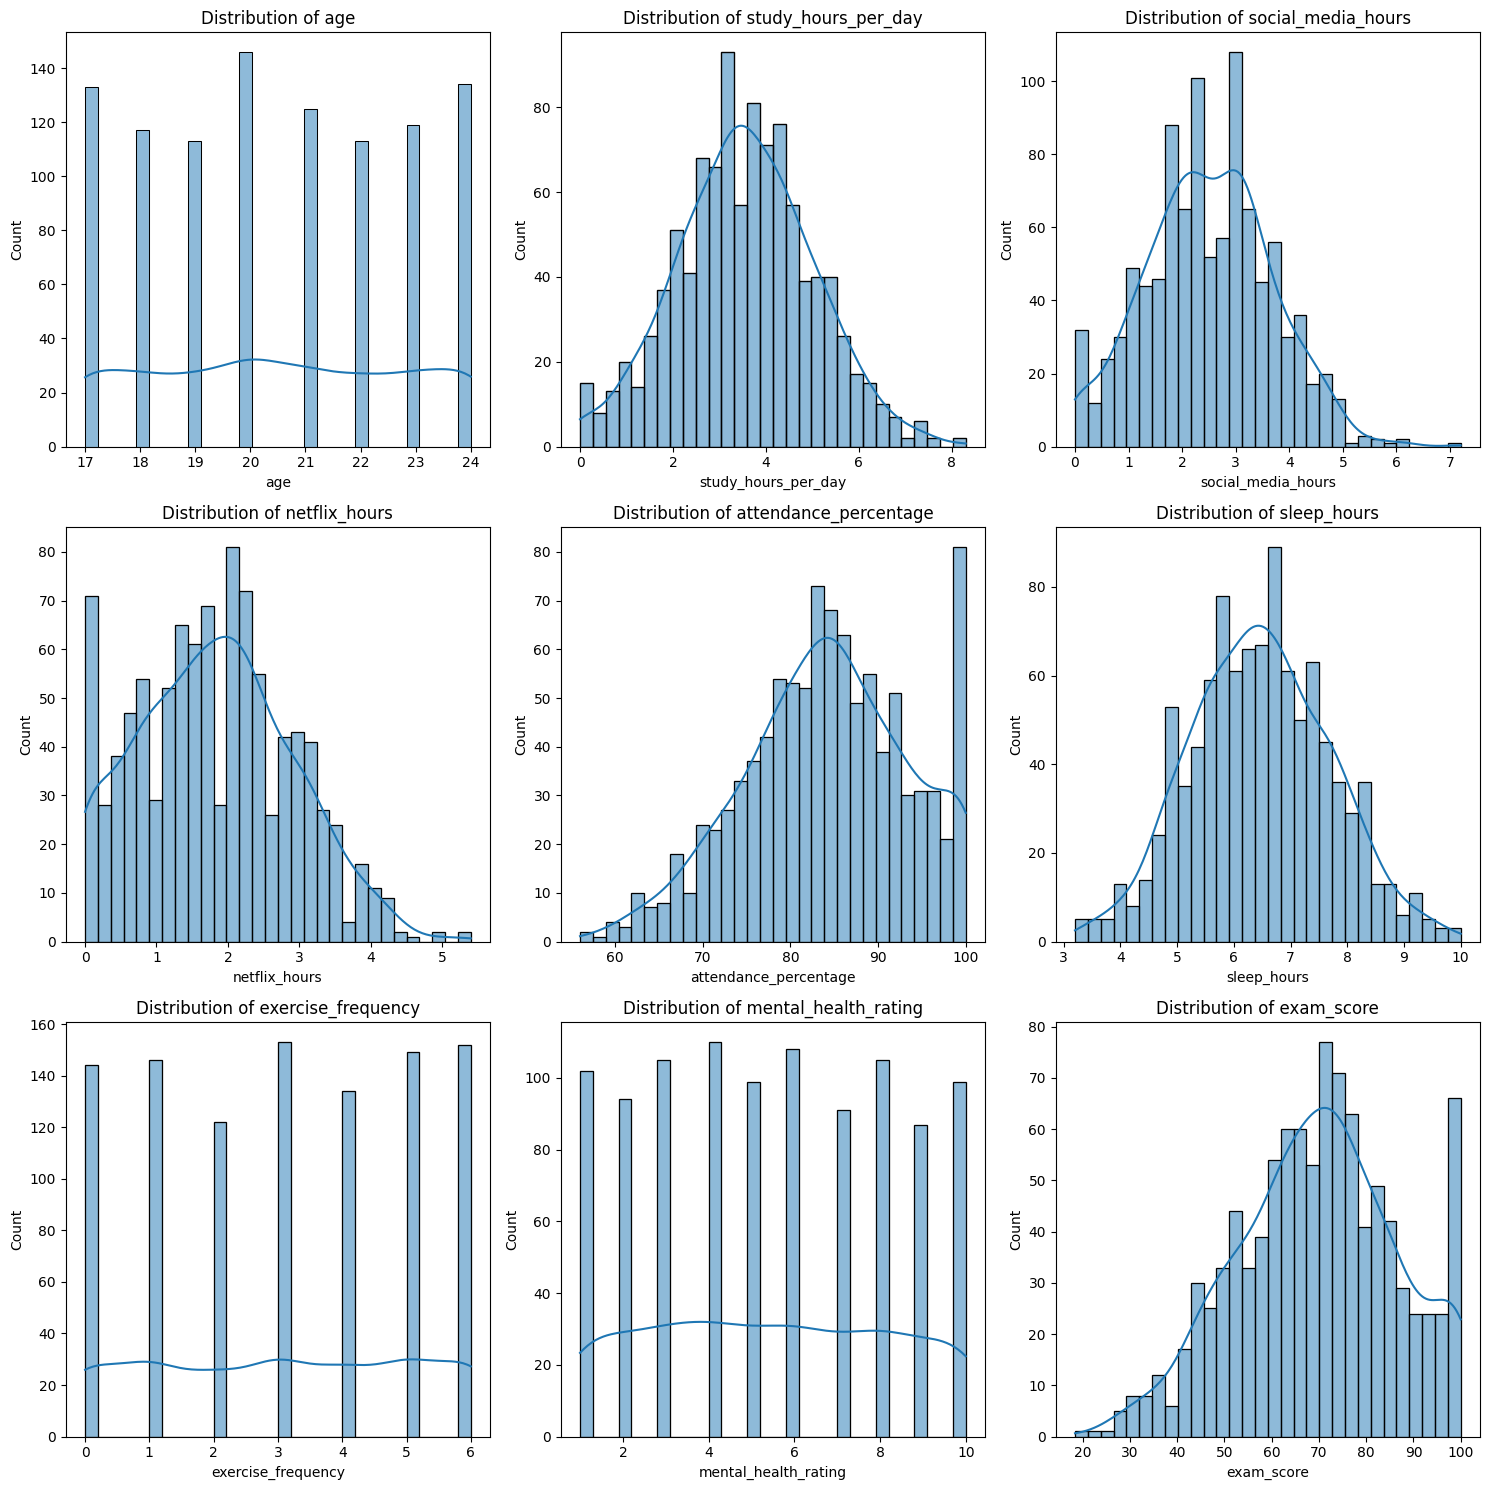

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()

plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=["exam_score", "student_id"])
y = df["exam_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Linear Regression:
Mean Squared Error (MSE): 26.4134685451923
R² Score: 0.8969950409013169


In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=["exam_score", "student_id"])
y = df["exam_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=6)
knn_model.fit(X_train, y_train)

y_knn_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_r2 = r2_score(y_test, y_knn_pred)

print("\nKNN:")
print("Mean Squared Error (MSE):", knn_mse)
print("R² Score:", knn_r2)


KNN:
Mean Squared Error (MSE): 121.19290416666668
R² Score: 0.5273823990446596


In [7]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=["exam_score", "student_id"])
y = df["exam_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print("Random Forest Regressor:")
print("MSE:", rf_mse)
print("R² Score:", rf_r2)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_gb_pred)
gb_r2 = r2_score(y_test, y_gb_pred)

print("\nGradient Boosting Regressor:")
print("MSE:", gb_mse)
print("R² Score:", gb_r2)

Random Forest Regressor:
MSE: 39.36291303000002
R² Score: 0.8464959178033369

Gradient Boosting Regressor:
MSE: 31.587593460007852
R² Score: 0.8768174362709298


Random Forest Regressor:
MSE: 39.36291303000002
R² Score: 0.8464959178033369

Gradient Boosting Regressor:
MSE: 31.587593460007852
R² Score: 0.8768174362709298


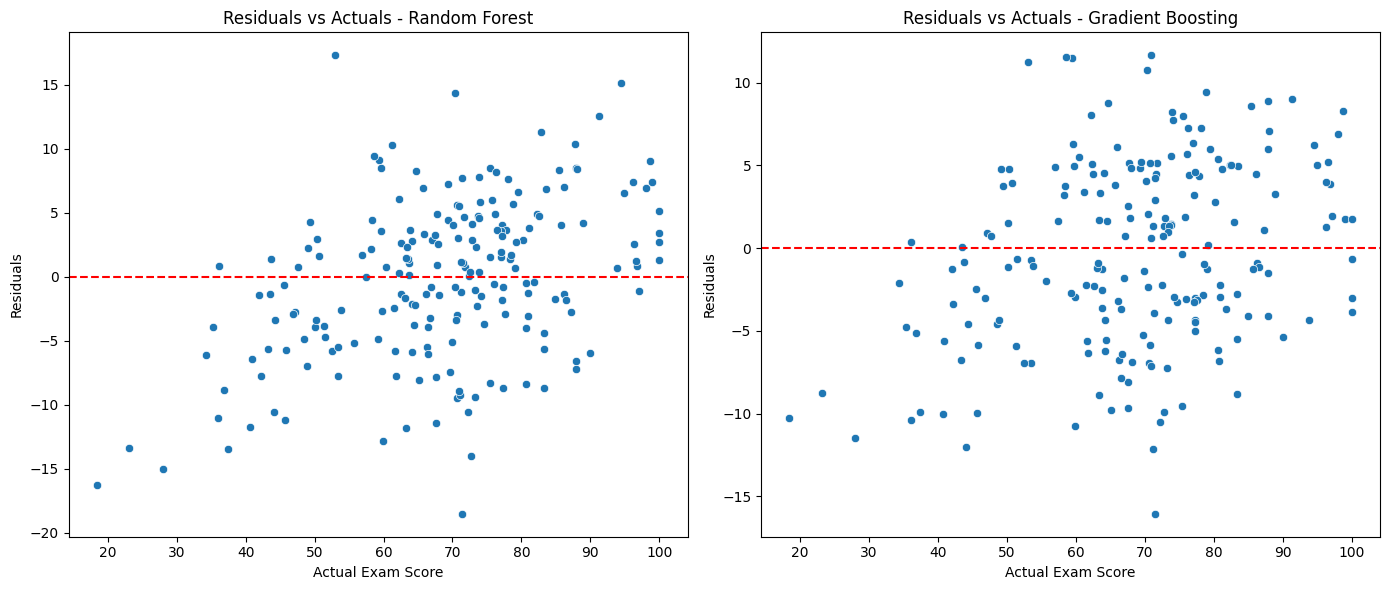

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=["exam_score", "student_id"])
y = df["exam_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print("Random Forest Regressor:")
print("MSE:", rf_mse)
print("R² Score:", rf_r2)

# --- Gradient Boosting Regressor ---
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_gb_pred)
gb_r2 = r2_score(y_test, y_gb_pred)

print("\nGradient Boosting Regressor:")
print("MSE:", gb_mse)
print("R² Score:", gb_r2)

# --- Residuals vs Actuals Plots ---
rf_residuals = y_test - y_rf_pred
gb_residuals = y_test - y_gb_pred

plt.figure(figsize=(14, 6))

# Random Forest
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=rf_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Actuals - Random Forest")
plt.xlabel("Actual Exam Score")
plt.ylabel("Residuals")

# Gradient Boosting
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=gb_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Actuals - Gradient Boosting")
plt.xlabel("Actual Exam Score")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

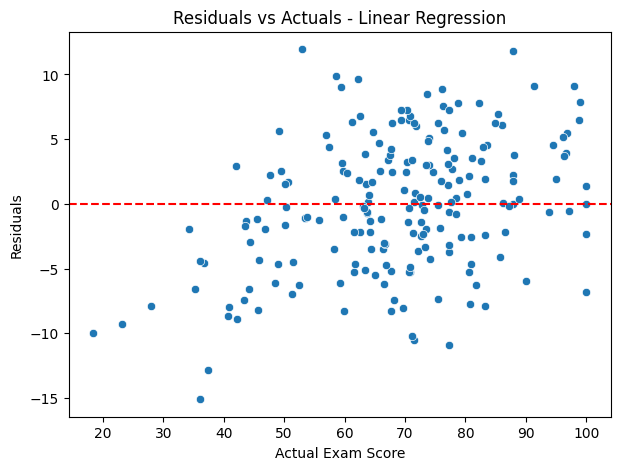

In [9]:
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Actuals - Linear Regression")
plt.xlabel("Actual Exam Score")
plt.ylabel("Residuals")
plt.show()

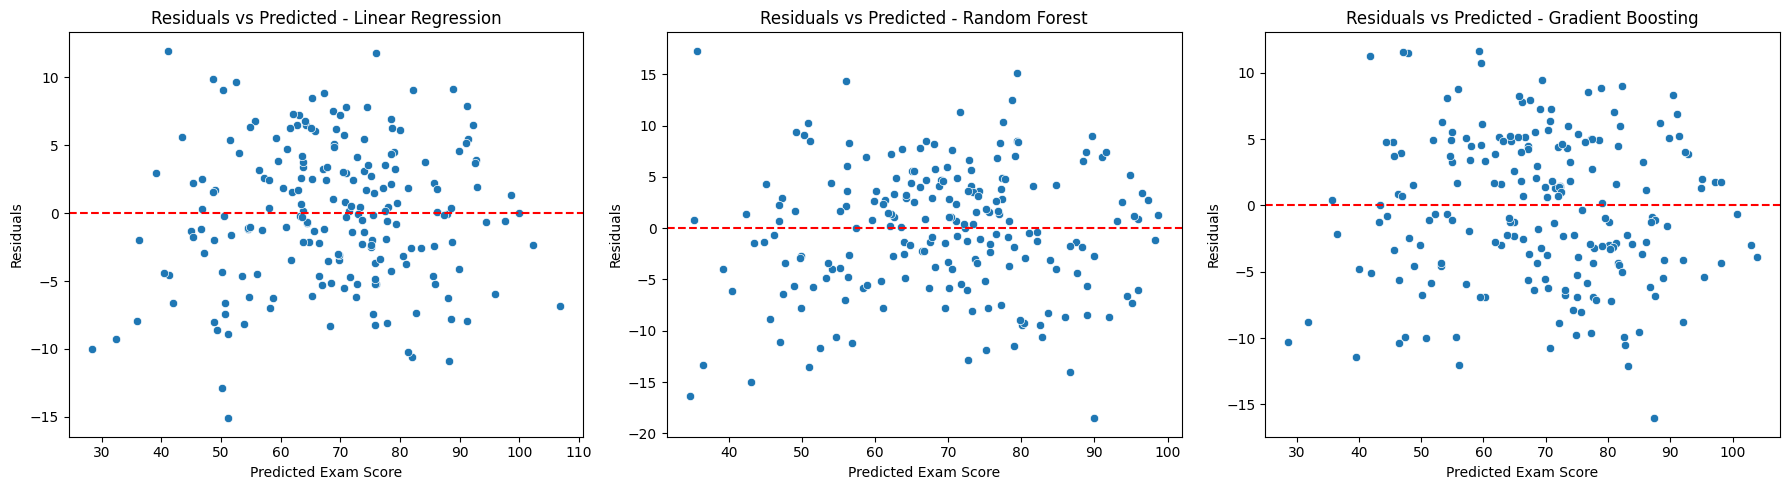

In [10]:
rf_residuals = y_test - y_rf_pred
gb_residuals = y_test - y_gb_pred
lr_residuals = y_test - y_pred 

lr_pred = y_pred             
rf_pred = y_rf_pred
gb_pred = y_gb_pred

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=lr_pred, y=lr_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted - Linear Regression")
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")

plt.subplot(1, 3, 2)
sns.scatterplot(x=rf_pred, y=rf_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted - Random Forest")
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")

plt.subplot(1, 3, 3)
sns.scatterplot(x=gb_pred, y=gb_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted - Gradient Boosting")
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


Computing SHAP values for Gradient Boosting...


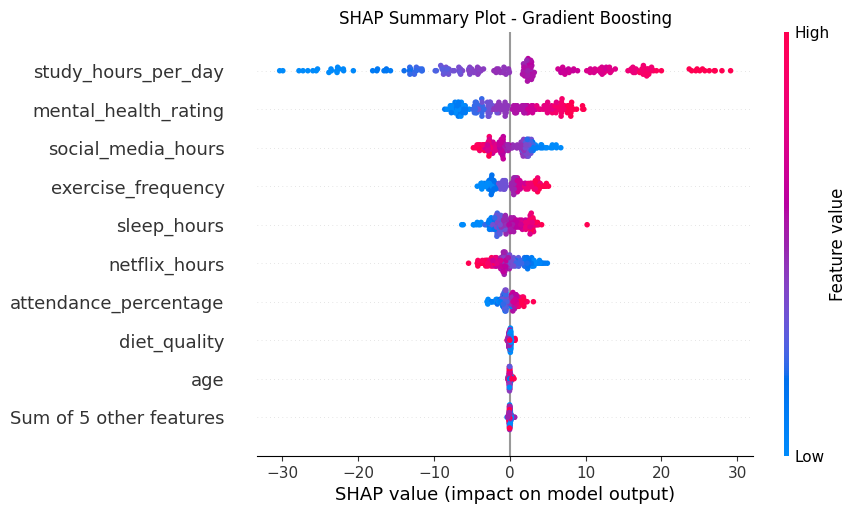

Computing SHAP values for Random Forest...


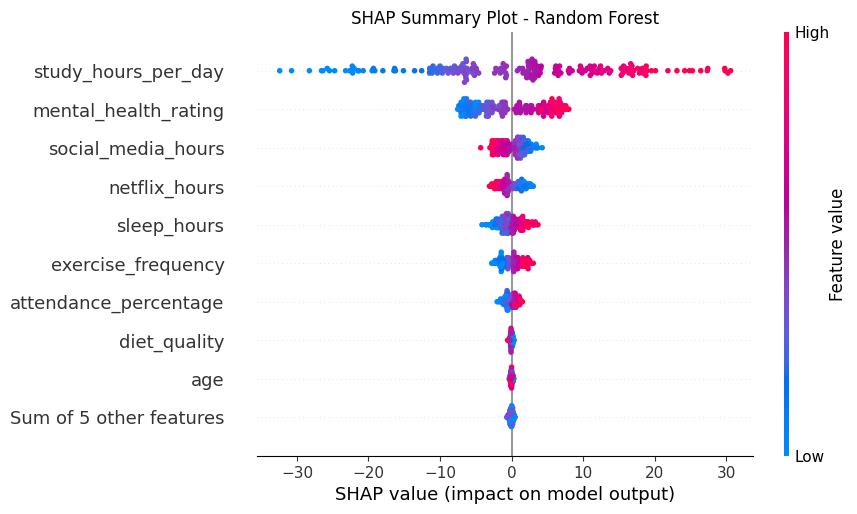

Computing SHAP values for Linear Regression...


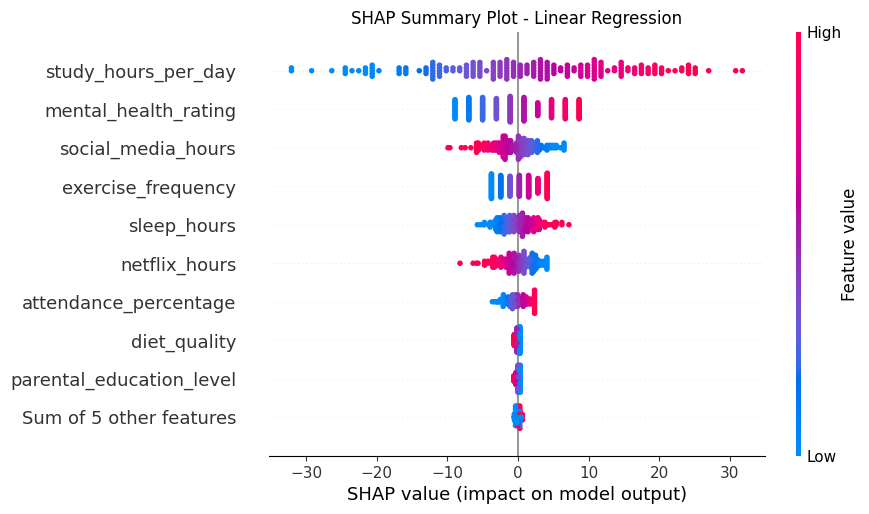

In [11]:
import shap
import numpy as np

X_test_array = X_test.copy()

# ---- Gradient Boosting ----
print("Computing SHAP values for Gradient Boosting...")
explainer_gb = shap.Explainer(gb_model, X_test_array)
shap_values_gb = explainer_gb(X_test_array, check_additivity=False)

plt.title("SHAP Summary Plot - Gradient Boosting")
shap.plots.beeswarm(shap_values_gb, max_display=10)
plt.show()

# ---- Random Forest ----
print("Computing SHAP values for Random Forest...")
explainer_rf = shap.Explainer(rf_model, X_test_array)
shap_values_rf = explainer_rf(X_test_array, check_additivity=False)

plt.title("SHAP Summary Plot - Random Forest")
shap.plots.beeswarm(shap_values_rf, max_display=10)
plt.show()

# ---- Linear Regression ----
print("Computing SHAP values for Linear Regression...")
explainer_lr = shap.Explainer(lr_model, X_train)  # use X_train for background for linear models
shap_values_lr = explainer_lr(X_test_array)

plt.title("SHAP Summary Plot - Linear Regression")
shap.plots.beeswarm(shap_values_lr, max_display=10)
plt.show()

In [12]:
top_features = [
    "study_hours_per_day", "mental_health_rating", "social_media_hours",
    "exercise_frequency", "sleep_hours", "netflix_hours",
    "attendance_percentage", "diet_quality", "parental_education_level"
]

categorical_cols = df[top_features].select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df[top_features]
y = df["exam_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_r2 = r2_score(y_test, y_lr_pred)

# --- Random Forest ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

# --- Gradient Boosting ---
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.111001, random_state=42)
gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_gb_pred)
gb_r2 = r2_score(y_test, y_gb_pred)

print("Linear Regression:")
print("  MSE:", lr_mse)
print("  R²:", lr_r2)

print("\nRandom Forest:")
print("  MSE:", rf_mse)
print("  R²:", rf_r2)

print("\nGradient Boosting:")
print("  MSE:", gb_mse)
print("  R²:", gb_r2)

Linear Regression:
  MSE: 26.216527838791336
  R²: 0.8977630532270358

Random Forest:
  MSE: 37.86131625500002
  R²: 0.8523517149746531

Gradient Boosting:
  MSE: 30.54369992964155
  R²: 0.8808883219334769


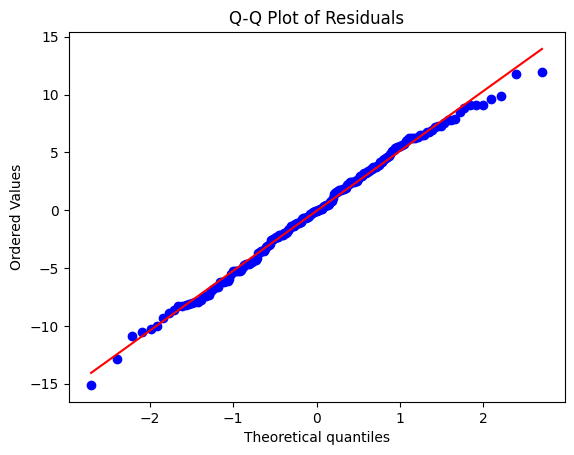

In [13]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [14]:
results = {
    "Model": [],
    "MSE": [],
    "R²": []
}

# Linear Regression
results["Model"].append("Linear Regression")
results["MSE"].append(mean_squared_error(y_test, y_lr_pred))
results["R²"].append(r2_score(y_test, y_lr_pred))

# Random Forest
results["Model"].append("Random Forest")
results["MSE"].append(mean_squared_error(y_test, y_rf_pred))
results["R²"].append(r2_score(y_test, y_rf_pred))

# Gradient Boosting
results["Model"].append("Gradient Boosting")
results["MSE"].append(mean_squared_error(y_test, y_gb_pred))
results["R²"].append(r2_score(y_test, y_gb_pred))

df_results = pd.DataFrame(results)
print(df_results)

               Model        MSE        R²
0  Linear Regression  26.216528  0.897763
1      Random Forest  37.861316  0.852352
2  Gradient Boosting  30.543700  0.880888
